<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/keras_hyperparameterOpt_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Last amended: 22nd Jan, 2021<br>
Hyperparameter tuning example of Neural Network using keras-tuner of dense network<br>
Ref:<br>
https://keras-team.github.io/keras-tuner/ <br>
https://blog.tensorflow.org/2020/01/hyperparameter-tuning-with-keras-tuner.html <br>


In [44]:
# 1.0 Install keras-tuner
#     It is not a part of tensorflow package
!pip install -q -U keras-tuner

In [45]:
# 1.1 Import normal libraries
import tensorflow as tf
from tensorflow import keras
import kerastuner as kt



In [46]:
# 1.2 Display outputs of multiple commands from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [47]:
# 2.0 Get data.
# Give a shortname for kears fashion_mnist module
fashion_mnist = keras.datasets.fashion_mnist

In [48]:
# 2.3 Download data. Data is downloaded. Download occurs only once.
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [49]:
# 3.0 About data
x_train.shape, x_test.shape, y_train.shape, y_test.shape  # ((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [50]:
# 3.1 Observe some pixel intensity values
x_train[10,10,:10]
y_train

array([  0,   0,   0,   0,   0,  31, 174,  28, 126, 153], dtype=uint8)

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [51]:
# 3.2 Nomalize pixel intensities
x_train = x_train/255
x_test = x_test/255
x_train[10,10,:10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.12156863, 0.68235294, 0.10980392, 0.49411765, 0.6       ])

In [52]:
# 3.3 Corresponding to values 0,1,2..9 in the target, the 
#  names of actual items are here:
items = [ "T-shirt/top","Trouser", "Pullover", "Dress" , "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot" ]

In [53]:
# 3.4 So which items are represented by y_train[0] and y_train[10]
items[y_train[0]]
items[y_train[10]]

'Ankle boot'

'T-shirt/top'

Experiments with diff weight initialization techniques<br>
Just for fun, we will use different weight initilizers<br>
Ref: https://keras.io/api/layers/initializers/

> **GlorotNormal**:
Draws samples from a truncated normal distribution centered on 0 with stddev = *sqrt(2 / (fan_in + fan_out))* where *fan_in* is the number of input units in the weight tensor and *fan_out* is the number of output units in the weight tensor.<br>
**GlorotUniform**:
Draws samples from a uniform distribution within *[-limit, limit]*, where limit = *sqrt(6 / (fan_in + fan_out))* (*fan_in* is the number of input units in the weight tensor and *fan_out* is the number of output units).

In [54]:
# 4.0 Let us build our dense NN model
from tensorflow.keras import initializers 
# Dense layer: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
model = keras.models.Sequential(
                                  [
                                    keras.layers.Flatten(input_shape = (28,28)),
                                    keras.layers.Dense(100,activation = 'relu', kernel_initializer=initializers.RandomNormal(stddev=0.01), name = "Ist"),
                                    keras.layers.Dense(100,activation = 'relu', kernel_initializer=tf.keras.initializers.GlorotNormal(), name = "IInd"),
                                    keras.layers.Dense(100,activation = 'relu', name = "IIIrd" ),
                                    keras.layers.Dense(10, activation = "softmax")
                                  ]
                               )

In [55]:
# 4.1 Get a summary of what layers are in our model
#     Does not give more details, such as activation etc,
#     about each layer
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
Ist (Dense)                  (None, 100)               78500     
_________________________________________________________________
IInd (Dense)                 (None, 100)               10100     
_________________________________________________________________
IIIrd (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


In [56]:
# 4.2 Let us look at model.layers object
#     Contains a list of layers and memory addresses
model.layers

In [57]:
# 4.3 First layer is Flatten layer. IInd 
#     and IIIrd layers are hidden layers.
#     What is its name?
first_hid_layer = model.layers[1]
first_hid_layer.name   # dense
model.layers[2].name   # dense_1

'Ist'

'IInd'

In [58]:
# 4.4 Get weights and biases of Ist hidden layer
weights,biases = first_hid_layer.get_weights()

In [59]:
# 4.5 Print 
weights
print("\n")
weights.shape    # (784, 100) 
                 # For each neuron in hidden layer, 
                 # there are 784 input weights
print("\n")
biases.shape     # (100,) For each neuron, there is one bias            

array([[-5.2759978e-03, -7.1604284e-03, -2.3670425e-03, ...,
         1.5191697e-02, -1.3541132e-02, -3.3133547e-03],
       [ 1.1934866e-02,  1.2985159e-02,  1.8728822e-02, ...,
        -1.6895626e-02,  9.6656652e-03, -4.9827620e-03],
       [-1.2851831e-02, -3.4100031e-03, -2.5947299e-03, ...,
        -4.4917017e-03, -1.4146616e-02, -7.1270806e-03],
       ...,
       [ 4.1175634e-04,  4.9299335e-05, -5.3887772e-03, ...,
        -8.6481273e-03,  5.4882369e-03, -6.1746943e-03],
       [-5.7845801e-04, -2.0908741e-02, -1.0567525e-02, ...,
        -9.2661269e-03,  1.4854411e-02, -6.6311395e-04],
       [ 1.8915642e-02, -1.0871917e-02,  8.8882940e-03, ...,
         1.2192859e-03,  8.4017403e-03, -6.5717101e-03]], dtype=float32)

(784, 100)

(100,)

(array([  7.,  14.,  67., 113., 179., 191., 135.,  53.,  17.,   8.]),
 array([-2.9785559e-02, -2.3845997e-02, -1.7906435e-02, -1.1966874e-02,
        -6.0273120e-03, -8.7750144e-05,  5.8518117e-03,  1.1791374e-02,
         1.7730935e-02,  2.3670496e-02,  2.9610058e-02], dtype=float32),
 <a list of 10 Patch objects>)

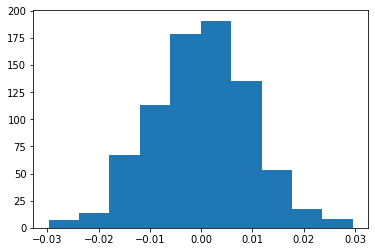

In [60]:
# 5.0 Let us draw a histogram of weights
#     arriving at IInd neuron in the hidden layer
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(weights[:,1])

In [61]:
# 5.1 Print biases
biases
biases.shape    # (100,)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

(100,)

In [62]:
# 6.0 Finally compile the model
model.compile(
               loss = 'sparse_categorical_crossentropy',
               optimizer = 'rmsprop',   # This is the default
               metrics = ['accuracy']
              )

In [63]:
# 6.1 Train the model now
model.fit(
           x_train,y_train,
           epochs = 10,
           verbose = 1
          )

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6776 - accuracy: 0.7516
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3988 - accuracy: 0.8560
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3675 - accuracy: 0.8699
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3556 - accuracy: 0.8760
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3566 - accuracy: 0.8756
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3532 - accuracy: 0.8795
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3548 - accuracy: 0.8788
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3570 - accuracy: 0.8785
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3520 - accuracy: 0.8797
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.353

**Tuning a keras model**<br>
> Step1: Build NN model with one argument, 'hp'<br>
> Step2: Design/instantiate keras-tuner<br>
> Step3: Run/execute tuner <br>
> Step4: Print results

In [64]:
# 7.0 Define a function that builds NN model
# and returns an NN model. It takes one argument

def build_model(hp):
   """Basic case:
      - We define a `build_model` function
      - It returns a compiled model
      - It uses hyperparameters defined on the fly
   """
   # 7.1 How many neurons in Ist hidden layer 
   n_size1 = hp.Int('n_size1', 32, 200, default=64)
   n_size2 = hp.Int('n_size2', 32, 200, default=64)

   # 7.2 Extent of dropout
   dropout1 = hp.Float('dropout1', 0, 0.5, step=0.1, default=0.5)
   dropout2 = hp.Float('dropout2', 0, 0.5, step=0.1, default=0.5)

   # 7.3 Which activation
   activation = hp.Choice('activation' , ['relu', 'tanh'])

   # 7.4 Build model
   model = keras.models.Sequential(
                                    [
                                      keras.layers.Flatten(input_shape = [28,28]),
                                      keras.layers.Dense(n_size1,activation = activation),
                                      keras.layers.Dropout(dropout1),
                                      keras.layers.Dense(n_size2,activation = activation),
                                      keras.layers.Dropout(dropout2),
                                      keras.layers.Dense(10, activation = "softmax")
                                    ]
                                  )
   # 7.5 Compile model
   model.compile(
                 loss = 'sparse_categorical_crossentropy',
                 optimizer=keras.optimizers.Adam(
                                                   hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
                                                 ),
                 metrics = ['accuracy'])
   
   return model

**Design tuner**<br>
Instantiate a tuner<br>
(Three methods)<br>
> In the tuner(), you should specify the model-building function (*build()*), the name of the *objective* to optimize (whether to minimize or maximize is automatically inferred for built-in metrics), the total number of trials (*max_trials*) to test, and the number of models that should be built and fit for each trial (*executions_per_trial*).<br><br>
**Note**: the purpose of having multiple executions per trial is to reduce results variance and therefore be able to more accurately assess the performance of a model. Within a given *trial* (say, trial=20), an '*hp*' is created. For each '*execution_per_trial*', *build()* is called and the same '*hp*' is passed. But selected parameter values by the same '*hp*' can be different. If you want to get results faster, you could set executions_per_trial=1 (single round of training for each model configuration).

In [65]:
# 8.1 Method 1
# Tune by pure random search
# What is 'executions_per_trial'
#  See: https://datascience.stackexchange.com/a/72292/64849
tuner_r = kt.RandomSearch(
                        build_model,              # Keras model to train
                        objective='val_accuracy', # Maximise/Minimise objective 
                        seed = 123,
                        max_trials = 5,           # Total number of trials to test at most.
                        executions_per_trial= 3,  # For each trial, run as many executions
                                                  # as in execution_per_trial. Given the randomness that
                                                  # exist in the optimization process, there may be some variation in
                                                  # the set of parameter selected by 'hp'. Final results could be very
                                                  # different. For each trial and execution, the tuner will fit the
                                                  #  model with as many epochs as you configure in the script.
                        directory='random_search',
                        overwrite=True,           # Overwrite results of last 'tuner'
                        project_name='fashion_mnist'
                      )

In [ ]:
# 8.2 Method 2
# Tune by optimized random search
# Hyperband is an optimized version of 
# random search which uses early-stopping
# to speed up the hyperparameter tuning process. 
# The main idea is to fit a large number of 
# models for a small number of epochs and to
# only continue training for the models 
# achieving the highest accuracy on the 
# validation set. The max_epochs variable
# is the max number of epochs that a model 
# can be trained for.

#tuner_h = kt.Hyperband(
#                     build_model,
#                     objective='val_accuracy',
#                     max_epochs=10,
#                     overwrite=True,            # Overwrite results of last 'tuner'
#                     hyperband_iterations=2
#                     )

In [66]:
# 8.3 Method 3
# Tune by Bayesian optimization
# Same signatures as of RandomSearch()
tuner_b = kt.tuners.BayesianOptimization(
                                       build_model,
                                       objective='val_accuracy',
                                       overwrite=True,  # Overwrite results of last 'tuner'
                                       max_trials=5,
                                       executions_per_trial= 3,
                                       )

**Start tuning**<br>
Invoke search() function<br>
> Here's what happens in search(): models are built iteratively by calling the model-building function, which populates the hyperparameter space (search space) tracked by the '*hp*' object. *Each call to build() may set different parameter combination.* The tuner progressively explores the space, recording metrics for each configuration.

In [67]:
# 9.0 Start tuning
# This is common to all three methods of tuning
# The call to search has the same signature as model.fit()
# Here's what happens in search: models are built iteratively
#  by calling the model-building function, which populates the
#   hyperparameter space (search space) tracked by the hp object. 
#     The tuner progressively explores the space, recording metrics
#       for each configuration.

# Total elapsed time: 00h 04m 46s

tuner_r.search(
             x_train,y_train,
             validation_data=(x_test,y_test),
             epochs=5,  # For each max_trials (5), 
                        #   there are sub-trials (3). 
                        #    For each sub-trial, 5-epochs
                        #     To speed         
             callbacks=[
                        tf.keras.callbacks.EarlyStopping(patience=1)   # The more the patience more the epochs
                        ] 
             )

Trial 5 Complete [00h 01m 38s]
val_accuracy: 0.8675000071525574

Best val_accuracy So Far: 0.8677333196004232
Total elapsed time: 00h 05m 35s
INFO:tensorflow:Oracle triggered exit


In [68]:
# 9.1 Tuning through Hyperband search
#     Number of trials may be upto 60

# Total elapsed time: 00h 14m 00s

#tuner_h.search(x_train,y_train,
#             validation_data=(x_test,y_test),
#             epochs=10,
#             callbacks=[
#                        tf.keras.callbacks.EarlyStopping(patience=1)
#                        ] 
#             )

In [69]:
# 9.2 Tuning through Bayesian search

# Total elapsed time: 00h 03m 34s

tuner_b.search(x_train,y_train,
             validation_data=(x_test,y_test),
             epochs=5,       # This value should be high
             callbacks=[
                        tf.keras.callbacks.EarlyStopping(patience=1)
                        ] 
             )

Trial 5 Complete [00h 02m 29s]
val_accuracy: 0.8700000047683716

Best val_accuracy So Far: 0.8700000047683716
Total elapsed time: 00h 08m 42s
INFO:tensorflow:Oracle triggered exit


In [70]:
# 9.3 Show a summary of the RandomSearch space
print("\n1. Random Search results summary")
tuner_r.results_summary()
#print("\n2. Hyperband results summary")
#tuner_h.results_summary()
print("\n3. Bayesian results summary")
tuner_b.results_summary()


1. Random Search results summary
Results summary
Results in random_search/fashion_mnist
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
n_size1: 130
n_size2: 119
dropout1: 0.2
dropout2: 0.2
activation: tanh
learning_rate: 0.001
Score: 0.8677333196004232
Trial summary
Hyperparameters:
n_size1: 134
n_size2: 100
dropout1: 0.0
dropout2: 0.4
activation: tanh
learning_rate: 0.001
Score: 0.8675000071525574
Trial summary
Hyperparameters:
n_size1: 144
n_size2: 129
dropout1: 0.0
dropout2: 0.1
activation: relu
learning_rate: 0.01
Score: 0.8151666720708212
Trial summary
Hyperparameters:
n_size1: 119
n_size2: 130
dropout1: 0.5
dropout2: 0.2
activation: tanh
learning_rate: 0.01
Score: 0.7469333410263062
Trial summary
Hyperparameters:
n_size1: 41
n_size2: 193
dropout1: 0.5
dropout2: 0.30000000000000004
activation: relu
learning_rate: 0.01
Score: 0.6293666760126749

3. Bayesian results summary
Results summary
Results in ./untitled_project
Showing 

In [71]:
# 10.0 Retrieve the best model.
best_model_r = tuner_r.get_best_models(num_models=1)[0]
#best_model_h = tuner_h.get_best_models(num_models=1)[0]
best_model_b = tuner_b.get_best_models(num_models=1)[0]

In [72]:
print("\n1. Random Search best model")
best_model_r
#print("\n2. Hyperband results best model")
#best_model_h
print("\n3. Bayesian results best model")
best_model_b


1. Random Search best model



3. Bayesian results best model


In [73]:
# 10.1 Evaluate the best model.
loss_r, accuracy_r = best_model_r.evaluate(x_test, y_test)
#loss_h, accuracy_h = best_model_h.evaluate(x_test, y_test)
loss_b, accuracy_b = best_model_b.evaluate(x_test, y_test) 

313/313 [==============================] - 1s 1ms/step - loss: 0.3489 - accuracy: 0.8762


In [74]:
print("\n1. Random Search Evaluation")
loss_r, accuracy_r
#print("\n2. Hyperband results Evaluation")
#loss_h, accuracy_h
print("\n3. Bayesian results Evaluation")
loss_b, accuracy_b


1. Random Search Evaluation


(0.34174400568008423, 0.8748999834060669)


3. Bayesian results Evaluation


(0.35246095061302185, 0.8755000233650208)

In [ ]:
####### I am done ########################